<a href="https://colab.research.google.com/github/farhanarrafi/NeuroTechRiceDatathon2025/blob/main/Rice_NeuroTech_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, make_scorer

from sklearn.preprocessing import StandardScaler


from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier

import matplotlib.pyplot as plt

In [3]:
traning_set_raw = pd.read_csv("Train_and_Validate_EEG.csv")

In [4]:
traning_set_raw.head()

,ID,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,F,31.55,2016.4.7,16.0,103.0,Mood disorder,Depressive disorder,48.843890,46.533704,...,84.825697,62.094883,49.639937,61.347225,81.630630,39.464753,72.168580,30.893891,74.038603,51.237679
1,2,M,25.00,2018.3.23,16.0,115.0,Healthy control,Healthy control,34.108015,22.838567,...,77.398455,48.282117,73.185133,66.742485,49.466312,59.270167,66.639938,40.297206,55.547526,63.630547
2,3,M,26.20,2015.4.10,16.0,83.0,Schizophrenia,Schizophrenia,31.084064,28.212342,...,91.510025,51.974239,62.571143,75.509166,56.460421,64.001966,78.424703,53.494830,66.581021,80.202968
3,4,M,21.00,2016.5.13,15.0,NaN,Obsessive compulsive disorder,Obsessive compulsitve disorder,14.310468,13.947459,...,79.855172,42.420095,56.473788,54.241183,69.561898,41.384408,66.332780,30.034691,65.659003,54.662177
4,5,F,28.15,2018.7.14,18.0,101.0,Healthy control,Healthy control,21.763093,23.938428,...,38.160508,21.319727,32.967416,33.401386,37.406879,27.080760,39.050046,14.826695,32.285940,41.015604


In [5]:
traning_set_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Columns: 1149 entries, ID to COH.F.gamma.r.O1.s.O2
dtypes: float64(1144), int64(1), object(4)
memory usage: 7.5+ MB


In [6]:
traning_set_raw.isna().sum().sum()

877

In [38]:
traning_set = traning_set_raw

In [39]:
traning_set['IQ'].fillna(traning_set['IQ'].mean(), inplace=True)
#traning_set_raw.method({'IQ': mean(traning_set_raw['IQ'])}, inplace=True)
#traning_set_raw.fillna({'IQ',traning_set_raw['IQ'].mean()}, inplace=True)

<ipython-input-39-9c17ed2144b5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traning_set['IQ'].fillna(traning_set['IQ'].mean(), inplace=True)


In [40]:
traning_set['education'].fillna(0, inplace=True)

<ipython-input-40-7b3d6d514c1b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traning_set['education'].fillna(0, inplace=True)


In [41]:
traning_set.isna().sum().sum()

0

In [42]:
traning_set.iloc[:, 8:].head()

,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,AB.A.delta.j.Cz,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,48.843890,46.533704,25.924618,30.221841,32.925321,37.285136,24.448520,14.944974,24.660186,37.710757,...,84.825697,62.094883,49.639937,61.347225,81.630630,39.464753,72.168580,30.893891,74.038603,51.237679
1,34.108015,22.838567,20.646824,18.203362,17.361846,16.311194,23.092874,8.016081,13.411826,18.135517,...,77.398455,48.282117,73.185133,66.742485,49.466312,59.270167,66.639938,40.297206,55.547526,63.630547
2,31.084064,28.212342,30.467865,48.643000,28.101162,39.882668,25.202585,22.667850,26.969479,37.164146,...,91.510025,51.974239,62.571143,75.509166,56.460421,64.001966,78.424703,53.494830,66.581021,80.202968
3,14.310468,13.947459,10.761600,13.844880,14.644941,12.350391,8.722063,7.969303,10.513884,13.064346,...,79.855172,42.420095,56.473788,54.241183,69.561898,41.384408,66.332780,30.034691,65.659003,54.662177
4,21.763093,23.938428,19.517805,24.859077,24.922886,22.290161,19.428280,18.424021,21.690679,24.637127,...,38.160508,21.319727,32.967416,33.401386,37.406879,27.080760,39.050046,14.826695,32.285940,41.015604


In [43]:
traning_set.isna().sum().sum()

0

In [44]:
traning_set.dropna(axis=1, inplace=True)

In [45]:
traning_set.isna().sum().sum()

0

In [46]:
traning_set.describe()

,ID,sex,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
count,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,...,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000
mean,471.409624,0.651408,30.548744,13.225352,101.396429,20.330829,21.312239,17.779699,19.009207,20.539433,...,75.842007,54.983694,56.947577,60.557073,69.813658,47.847909,66.709123,39.249992,66.130099,56.903789
std,274.989580,0.476804,11.738390,3.031122,16.964710,11.443365,12.417935,10.092519,9.228564,9.888272,...,15.782265,19.511627,18.203185,17.744601,17.748133,19.598164,16.843523,20.843316,17.917650,19.604724
min,1.000000,0.000000,18.000000,0.000000,49.000000,3.272260,3.244199,3.050507,3.412618,5.066593,...,12.611954,0.519048,6.926792,2.214436,2.421748,0.036664,1.032207,1.228502,1.643951,4.340159
25%,230.750000,0.000000,21.752500,12.000000,91.000000,12.772447,13.003745,11.126119,12.484469,13.640454,...,68.067727,41.659341,44.045125,48.632636,59.196016,32.655800,56.154806,22.041208,54.987797,43.834643
50%,472.500000,1.000000,26.010000,13.000000,102.000000,17.137013,17.930642,15.549407,16.786912,18.048815,...,78.624002,55.105995,56.404859,61.108607,72.173855,45.701515,67.985444,36.305708,68.081346,57.180194
75%,710.250000,1.000000,35.535000,16.000000,114.000000,24.816483,25.992534,21.773787,23.330560,25.571022,...,87.165614,69.635095,70.607069,73.696268,83.026180,61.997235,78.736665,54.004810,78.978633,71.045497
max,945.000000,1.000000,71.880000,20.000000,145.000000,92.826192,101.515687,91.373456,82.544167,101.566662,...,99.603886,100.000000,99.307895,100.000000,99.581629,98.720067,99.650154,98.413320,100.000000,99.287092


In [47]:
traning_set.keys()[:122]

Index(['ID', 'sex', 'age', 'eeg.date', 'education', 'IQ', 'main.disorder',
       'specific.disorder', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       ...
       'AB.F.gamma.j.Cz', 'AB.F.gamma.k.C4', 'AB.F.gamma.l.T4',
       'AB.F.gamma.m.T5', 'AB.F.gamma.n.P3', 'AB.F.gamma.o.Pz',
       'AB.F.gamma.p.P4', 'AB.F.gamma.q.T6', 'AB.F.gamma.r.O1',
       'AB.F.gamma.s.O2'],
      dtype='object', length=122)

In [48]:
traning_set.keys()[122:]

Index(['COH.A.delta.a.FP1.b.FP2', 'COH.A.delta.a.FP1.c.F7',
       'COH.A.delta.a.FP1.d.F3', 'COH.A.delta.a.FP1.e.Fz',
       'COH.A.delta.a.FP1.f.F4', 'COH.A.delta.a.FP1.g.F8',
       'COH.A.delta.a.FP1.h.T3', 'COH.A.delta.a.FP1.i.C3',
       'COH.A.delta.a.FP1.j.Cz', 'COH.A.delta.a.FP1.k.C4',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1026)

In [49]:
# Label encoding for sex
sex_types = traning_set['sex'].unique()
sex_encoder = LabelEncoder()
sex_encoder = sex_encoder.fit(sex_types)
traning_set['sex'] = sex_encoder.transform(traning_set['sex'])
traning_set['sex'] = traning_set['sex'].astype(float)

In [50]:
# Create labels

Y_Main = traning_set[['main.disorder']]
Y_Specific = traning_set[['specific.disorder']]

In [51]:
n_classes_Y_Main = traning_set['main.disorder'].nunique()
n_classes_Y_Specific = traning_set['specific.disorder'].nunique()

In [52]:
main_encoder = LabelEncoder()
main_encoder.fit(traning_set['main.disorder'].unique())

specific_encoder = LabelEncoder()
specific_encoder.fit(traning_set['specific.disorder'].unique())

#encoded_disorder_types = encoder.fit_transform(disorder_types)
Y_Main['main.disorder'] = main_encoder.transform(Y_Main['main.disorder'])
Y_Specific['specific.disorder'] = specific_encoder.transform(Y_Specific['specific.disorder'])

<ipython-input-52-48a6ed869c15>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_Main['main.disorder'] = main_encoder.transform(Y_Main['main.disorder'])
<ipython-input-52-48a6ed869c15>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_Specific['specific.disorder'] = specific_encoder.transform(Y_Specific['specific.disorder'])


In [53]:
# Training Data Combined (PSD and Coherence)
X = traning_set.drop(labels=['ID','main.disorder','specific.disorder','eeg.date'], axis=1)

In [54]:
X.head()

,sex,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,0.0,31.55,16.0,103.000000,48.843890,46.533704,25.924618,30.221841,32.925321,37.285136,...,84.825697,62.094883,49.639937,61.347225,81.630630,39.464753,72.168580,30.893891,74.038603,51.237679
1,1.0,25.00,16.0,115.000000,34.108015,22.838567,20.646824,18.203362,17.361846,16.311194,...,77.398455,48.282117,73.185133,66.742485,49.466312,59.270167,66.639938,40.297206,55.547526,63.630547
2,1.0,26.20,16.0,83.000000,31.084064,28.212342,30.467865,48.643000,28.101162,39.882668,...,91.510025,51.974239,62.571143,75.509166,56.460421,64.001966,78.424703,53.494830,66.581021,80.202968
3,1.0,21.00,15.0,101.396429,14.310468,13.947459,10.761600,13.844880,14.644941,12.350391,...,79.855172,42.420095,56.473788,54.241183,69.561898,41.384408,66.332780,30.034691,65.659003,54.662177
4,0.0,28.15,18.0,101.000000,21.763093,23.938428,19.517805,24.859077,24.922886,22.290161,...,38.160508,21.319727,32.967416,33.401386,37.406879,27.080760,39.050046,14.826695,32.285940,41.015604


In [55]:
# Creating Coherence traing data
X1 = traning_set.iloc[:,122:]

In [56]:
X1.head()

,COH.A.delta.a.FP1.b.FP2,COH.A.delta.a.FP1.c.F7,COH.A.delta.a.FP1.d.F3,COH.A.delta.a.FP1.e.Fz,COH.A.delta.a.FP1.f.F4,COH.A.delta.a.FP1.g.F8,COH.A.delta.a.FP1.h.T3,COH.A.delta.a.FP1.i.C3,COH.A.delta.a.FP1.j.Cz,COH.A.delta.a.FP1.k.C4,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,85.056680,84.314205,88.042424,83.884944,82.149375,72.833467,60.871505,65.350069,66.420318,64.607528,...,84.825697,62.094883,49.639937,61.347225,81.630630,39.464753,72.168580,30.893891,74.038603,51.237679
1,84.994328,57.571481,75.298051,71.616382,71.689026,67.199502,54.203167,53.709334,57.814205,54.784160,...,77.398455,48.282117,73.185133,66.742485,49.466312,59.270167,66.639938,40.297206,55.547526,63.630547
2,43.406463,33.374232,37.783015,27.851427,21.117138,29.253659,11.643563,22.267045,16.593847,17.056184,...,91.510025,51.974239,62.571143,75.509166,56.460421,64.001966,78.424703,53.494830,66.581021,80.202968
3,71.056801,47.654212,64.237775,57.735298,42.268341,33.371634,25.683018,33.231000,29.081953,37.188230,...,79.855172,42.420095,56.473788,54.241183,69.561898,41.384408,66.332780,30.034691,65.659003,54.662177
4,53.959370,34.966537,39.378423,29.028669,34.845740,32.253272,27.062732,27.416977,17.229853,14.458126,...,38.160508,21.319727,32.967416,33.401386,37.406879,27.080760,39.050046,14.826695,32.285940,41.015604


In [57]:
# Creating PSD Traning Data
X2 = traning_set.iloc[:,0:122]

In [58]:
X2.drop(labels=['ID','main.disorder','specific.disorder','eeg.date'], axis=1, inplace=True)

In [59]:
X2.head()

,sex,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,AB.F.gamma.j.Cz,AB.F.gamma.k.C4,AB.F.gamma.l.T4,AB.F.gamma.m.T5,AB.F.gamma.n.P3,AB.F.gamma.o.Pz,AB.F.gamma.p.P4,AB.F.gamma.q.T6,AB.F.gamma.r.O1,AB.F.gamma.s.O2
0,0.0,31.55,16.0,103.000000,48.843890,46.533704,25.924618,30.221841,32.925321,37.285136,...,4.693986,3.894055,2.269100,3.179024,3.375610,3.396393,3.583319,2.388181,4.271034,4.093793
1,1.0,25.00,16.0,115.000000,34.108015,22.838567,20.646824,18.203362,17.361846,16.311194,...,6.600235,4.932718,2.630569,0.597911,1.625700,2.268950,3.123711,2.507125,1.333279,7.415794
2,1.0,26.20,16.0,83.000000,31.084064,28.212342,30.467865,48.643000,28.101162,39.882668,...,2.763770,2.252665,2.052866,1.912678,2.727597,2.840801,2.968606,6.313069,2.739807,7.644500
3,1.0,21.00,15.0,101.396429,14.310468,13.947459,10.761600,13.844880,14.644941,12.350391,...,6.185418,6.116184,8.282201,5.601934,5.800018,5.847705,5.805174,5.484827,5.648344,5.717446
4,0.0,28.15,18.0,101.000000,21.763093,23.938428,19.517805,24.859077,24.922886,22.290161,...,1.978674,1.839297,1.533745,1.461961,1.657828,1.687908,1.787018,1.440013,1.483373,1.406914


In [60]:
# Scaling traning data
# https://www.kaggle.com/code/sahaneearman/multi-class-classification-using-only-psd-values
stdScaler = StandardScaler()

In [61]:
X_scaled = X
X_scaled.iloc[:, 4:] = stdScaler.fit_transform(X.iloc[:, 4:])

In [62]:
# Split Test and Train dataset for Combined Data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, Y_Main, test_size=0.2)

In [63]:
y_train = np.reshape(y_train, -1)

In [64]:
X1_scaled = stdScaler.fit_transform(X1)

In [65]:
# Scaling traning data
X2_scaled = X2
X2_scaled.iloc[:, 4:] = stdScaler.fit_transform(X2.iloc[:, 4:])

In [66]:
X1_train, X1_val, y1_1_train, y1_1_val = train_test_split(X1_scaled, Y_Main, test_size=0.3)

In [67]:
X2_train, X2_val, y1_2_train, y1_2_val = train_test_split(X2_scaled, Y_Main, test_size=0.3)

In [68]:
y1_1_train = np.reshape(y1_1_train, -1)
y1_2_train = np.reshape(y1_2_train, -1)

In [69]:
# Oversmapling for balancing the data

smt = SMOTE()

X1_train_smote, y1_1_train_smote = smt.fit_resample(X1_train, y1_1_train)
X2_train_smote, y1_2_train_smote = smt.fit_resample(X2_train, y1_2_train)

In [70]:
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)

In [ ]:
# https://github.com/farhanarrafi/UNT-CS-Machine-Learning-Project/blob/main/Project_Farhan/MachineLearning_Project.ipynb
# Gradient Boosting for classification
from sklearn.ensemble import GradientBoostingClassifier

gradBoostingClassifier = GradientBoostingClassifier(n_estimators=50,
                                                    learning_rate=0.05,
                                                    min_samples_split=80,
                                                    max_depth=2,
                                                    random_state=1)
gradBoostingClassifier.fit(X1_train_smote, y1_1_train_smote)

train_score1 = gradBoostingClassifier.score(X1_train_smote, y1_1_train_smote)
test_score1 = gradBoostingClassifier.score(X1_val, y1_val)

gradBoostingClassifier.fit(X2_train_smote, y1_2_train_smote)

train_score2 = gradBoostingClassifier.score(X2_train_smote, y1_2_train_smote)
test_score2 = gradBoostingClassifier.score(X2_val, y1_val)

print(f"Training Accuracy X1: {train_score1}")
print(f"Testing Accuracy X1: {test_score1}")

print(f"Training Accuracy X2: {train_score2}")
print(f"Testing Accuracy X2: {test_score2}")

In [71]:
# https://github.com/farhanarrafi/UNT-CS-Machine-Learning-Project/blob/main/Project_Farhan/MachineLearning_Project.ipynb
# Gradient Boosting for classification
from sklearn.ensemble import GradientBoostingClassifier

gradBoostingClassifier = GradientBoostingClassifier(n_estimators=50,
                                                    learning_rate=0.05,
                                                    min_samples_split=80,
                                                    max_depth=2,
                                                    random_state=1)
gradBoostingClassifier.fit(X_train_smote, y_train_smote)

train_score = gradBoostingClassifier.score(X_train_smote, y_train_smote)
test_score = gradBoostingClassifier.score(X_val, y_val)

print(f"Training Accuracy X: {train_score}")
print(f"Testing Accuracy X: {test_score}")

Training Accuracy X: 0.7813852813852814
Testing Accuracy X: 0.2222222222222222


In [90]:
# https://www.kaggle.com/code/sahaneearman/multi-class-classification-using-only-psd-values


classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=50)
}

metrics = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted', zero_division=0.0),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'mcc':make_scorer(matthews_corrcoef)
}

In [122]:
# https://www.kaggle.com/code/sahaneearman/multi-class-classification-using-only-psd-values

results = {}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for clf_name, clf in classifiers.items():
    results[clf_name] = {}
    for metric_name, metric_func in metrics.items():
        scores = cross_val_score(clf, X_train_smote, y_train_smote, cv=skf, scoring=metric_func)
        results[clf_name][metric_name] = {
            'mean': np.mean(scores),
            'std': np.std(scores),
            'scores': scores
        }

    print(f"\n{clf_name} Results:")
    for metric_name in metrics.keys():
        print(f"  {metric_name.capitalize()}: Mean={results[clf_name][metric_name]['mean']:.4f}, "
              f"Std={results[clf_name][metric_name]['std']:.4f}")


KNN Results:
  Accuracy: Mean=0.6520, Std=0.0322
  Precision: Mean=0.6446, Std=0.0676
  Recall: Mean=0.6520, Std=0.0322
  F1: Mean=0.6107, Std=0.0348
  Mcc: Mean=0.6045, Std=0.0380

SVM Results:
  Accuracy: Mean=0.4262, Std=0.0280
  Precision: Mean=0.3956, Std=0.0293
  Recall: Mean=0.4262, Std=0.0280
  F1: Mean=0.3830, Std=0.0276
  Mcc: Mean=0.3399, Std=0.0330

Random Forest Results:
  Accuracy: Mean=0.7893, Std=0.0398
  Precision: Mean=0.7576, Std=0.0268
  Recall: Mean=0.7798, Std=0.0462
  F1: Mean=0.7694, Std=0.0309
  Mcc: Mean=0.7591, Std=0.0386


In [91]:
# https://www.kaggle.com/code/sahaneearman/multi-class-classification-using-only-psd-values

results = {}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for clf_name, clf in classifiers.items():
    results[clf_name] = {}
    for metric_name, metric_func in metrics.items():
        scores = cross_val_score(clf, X1_train_smote, y1_1_train_smote, cv=skf, scoring=metric_func)
        results[clf_name][metric_name] = {
            'mean': np.mean(scores),
            'std': np.std(scores),
            'scores': scores
        }

    print(f"\n{clf_name} Results:")
    for metric_name in metrics.keys():
        print(f"  {metric_name.capitalize()}: Mean={results[clf_name][metric_name]['mean']:.4f}, "
              f"Std={results[clf_name][metric_name]['std']:.4f}")


KNN Results:
  Accuracy: Mean=0.6468, Std=0.0368
  Precision: Mean=0.6210, Std=0.0651
  Recall: Mean=0.6468, Std=0.0368
  F1: Mean=0.5914, Std=0.0376
  Mcc: Mean=0.6024, Std=0.0429

SVM Results:
  Accuracy: Mean=0.7268, Std=0.0319
  Precision: Mean=0.7281, Std=0.0349
  Recall: Mean=0.7268, Std=0.0319
  F1: Mean=0.7227, Std=0.0346
  Mcc: Mean=0.6829, Std=0.0368

Random Forest Results:
  Accuracy: Mean=0.7606, Std=0.0232
  Precision: Mean=0.7387, Std=0.0283
  Recall: Mean=0.7535, Std=0.0195
  F1: Mean=0.7480, Std=0.0357
  Mcc: Mean=0.7196, Std=0.0313


In [92]:
results = {}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for clf_name, clf in classifiers.items():
    results[clf_name] = {}
    for metric_name, metric_func in metrics.items():
        scores = cross_val_score(clf, X2_train_smote, y1_2_train_smote, cv=skf, scoring=metric_func)
        results[clf_name][metric_name] = {
            'mean': np.mean(scores),
            'std': np.std(scores),
            'scores': scores
        }

    print(f"\n{clf_name} Results:")
    for metric_name in metrics.keys():
        print(f"  {metric_name.capitalize()}: Mean={results[clf_name][metric_name]['mean']:.4f}, "
              f"Std={results[clf_name][metric_name]['std']:.4f}")


KNN Results:
  Accuracy: Mean=0.5981, Std=0.0327
  Precision: Mean=0.5940, Std=0.0369
  Recall: Mean=0.5981, Std=0.0327
  F1: Mean=0.5646, Std=0.0345
  Mcc: Mean=0.5390, Std=0.0384

SVM Results:
  Accuracy: Mean=0.2857, Std=0.0390
  Precision: Mean=0.2600, Std=0.0715
  Recall: Mean=0.2857, Std=0.0390
  F1: Mean=0.2395, Std=0.0344
  Mcc: Mean=0.1745, Std=0.0484

Random Forest Results:
  Accuracy: Mean=0.6816, Std=0.0250
  Precision: Mean=0.6760, Std=0.0325
  Recall: Mean=0.6996, Std=0.0402
  F1: Mean=0.6718, Std=0.0271
  Mcc: Mean=0.6326, Std=0.0312


In [126]:
# create model instance
XGBoostX = XGBClassifier(n_estimators=20,
                        max_depth=3,
                        learning_rate=0.05,
                        reg_lambda = 1, # regularization param
                        reg_alpha = 1,  # regularization param
                        num_class = n_classes_Y_Main,
                        objective='multi:softmax')

In [127]:
# fit model
XGBoostX.fit(X_train, y_train)
# make predictions
predictionX = XGBoostX.predict(X_val)

In [128]:
#https://github.com/farhanarrafi/UNT-CS-Machine-Learning-Project/blob/main/Project_Farhan/MachineLearning_Project.ipynb

train_accuracy = XGBoostX.score(X_train,y_train)
print(f"XGBClassifier Training Accuracy: {train_accuracy}")

classification_accuracy = accuracy_score(y_val, predictionX)
print(f"XGBClassifier Classification/Test Accuracy: {classification_accuracy}")

f1score = f1_score(y_val, predictionX, average='weighted')
print(f"XGBClassifier F1 score: {f1score}")

precision = precision_score(y_val, predictionX, average='weighted')
print(f"XGBClassifier Precision: {precision}")

recall = recall_score(y_val, predictionX, average='weighted')
print(f"XGBClassifier Recall: {recall}")

mcc = matthews_corrcoef(y_val, predictionX)
print(f"XGBClassifier mcc: {mcc}")

XGBClassifier Training Accuracy: 0.7432885906040269
XGBClassifier Classification/Test Accuracy: 0.2734375
XGBClassifier F1 score: 0.23812355473699798
XGBClassifier Precision: 0.266004709656109
XGBClassifier Recall: 0.2734375
XGBClassifier mcc: 0.07556156802479533


In [102]:
# https://www.kaggle.com/code/emmanuelfwerr/xgboost-multi-class-classification#XGBoost-Classifier


# create model instance
XGBoostX1 = XGBClassifier(n_estimators=20,
                        max_depth=3,
                        learning_rate=0.05,
                        reg_lambda = 1, # regularization param
                        reg_alpha = 1,  # regularization param
                        num_class = n_classes_Y_Main,
                        objective='multi:softmax')

# create model instance
XGBoostX2 = XGBClassifier(n_estimators=20,
                        max_depth=3,
                        learning_rate=0.05,
                        reg_lambda = 1, # regularization param
                        reg_alpha = 1,  # regularization param
                        num_class = n_classes_Y_Main,
                        objective='multi:softmax')

In [103]:
# fit model
XGBoostX1.fit(X1_train, y1_1_train)
# make predictions
predictionX1 = XGBoostX1.predict(X1_val)

# fit model
XGBoostX2.fit(X2_train, y1_2_train)
# make predictions
predictionX2 = XGBoostX2.predict(X2_val)

In [104]:
#https://github.com/farhanarrafi/UNT-CS-Machine-Learning-Project/blob/main/Project_Farhan/MachineLearning_Project.ipynb

train_accuracy = XGBoostX1.score(X1_train,y1_1_train)
print(f"XGBClassifier Training Accuracy: {train_accuracy}")

classification_accuracy = accuracy_score(y1_1_val, predictionX1)
print(f"XGBClassifier Classification/Test Accuracy: {classification_accuracy}")

f1score = f1_score(y1_1_val, predictionX1, average='weighted')
print(f"XGBClassifier F1 score: {f1score}")

precision = precision_score(y1_1_val, predictionX1, average='weighted')
print(f"XGBClassifier Precision: {precision}")

recall = recall_score(y1_1_val, predictionX1, average='weighted')
print(f"XGBClassifier Recall: {recall}")

mcc = matthews_corrcoef(y1_1_val, predictionX1)
print(f"XGBClassifier mcc: {mcc}")

XGBClassifier Training Accuracy: 0.7197986577181208
XGBClassifier Classification/Test Accuracy: 0.26953125
XGBClassifier F1 score: 0.18862596649484537
XGBClassifier Precision: 0.16388069175410278
XGBClassifier Recall: 0.26953125
XGBClassifier mcc: 0.03531575141096729


In [105]:
#https://github.com/farhanarrafi/UNT-CS-Machine-Learning-Project/blob/main/Project_Farhan/MachineLearning_Project.ipynb

train_accuracy = XGBoostX2.score(X2_train,y1_2_train)
print(f"XGBClassifier Training Accuracy: {train_accuracy}")

classification_accuracy = accuracy_score(y1_2_val, predictionX2)
print(f"XGBClassifier Classification/Test Accuracy: {classification_accuracy}")

f1score = f1_score(y1_2_val, predictionX2, average='weighted')
print(f"XGBClassifier F1 score: {f1score}")

precision = precision_score(y1_2_val, predictionX2, average='weighted')
print(f"XGBClassifier Precision: {precision}")

recall = recall_score(y1_2_val, predictionX2, average='weighted')
print(f"XGBClassifier Recall: {recall}")

mcc = matthews_corrcoef(y1_2_val, predictionX2)
print(f"XGBClassifier mcc: {mcc}")

XGBClassifier Training Accuracy: 0.575503355704698
XGBClassifier Classification/Test Accuracy: 0.33984375
XGBClassifier F1 score: 0.303840706707086
XGBClassifier Precision: 0.30794464963404716
XGBClassifier Recall: 0.33984375
XGBClassifier mcc: 0.15171438920523483


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## LSTM Implementation

Rerefences:

[LSTM for Sequence Classification - Medium](https://medium.com/@hkabhi916/understanding-lstm-for-sequence-classification-a-practical-guide-with-pytorch-ac40e84ad3d5)

[LSTM Geeks for Geeks](https://www.geeksforgeeks.org/long-short-term-memory-networks-using-pytorch/)

[LSTM with Gridsearch - Kaggle](https://www.kaggle.com/code/tenebris97/gridsearch-shap-lstm-dnn#3.1-LSTM)


In [110]:
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_val.shape: {X_val.shape}")
print(f"y_val.shape: {y_val.shape}")

X_train.shape: (681, 1144)
y_train.shape: (681,)
X_val.shape: (171, 1144)
y_val.shape: (171,)


In [153]:
y_val = np.reshape(y_val, -1)

In [170]:
# X1_train, X1_val, y1_1_train, y1_1_val
print(f"X1_train.shape: {X1_train.shape}")
print(f"y1_1_train.shape: {y1_1_train.shape}")
print(f"X1_val.shape: {X1_val.shape}")
print(f"y1_1_val.shape: {y1_1_val.shape}")

X1_train.shape: (596, 1026)
y1_1_train.shape: (596,)
X1_val.shape: (256, 1026)
y1_1_val.shape: (256,)


In [154]:
y1_1_val = np.reshape(y1_1_val, -1)

In [187]:
# X2_train, X2_val, y1_2_train, y1_2_val
print(f"X2_train.shape: {X2_train.shape}")
print(f"y1_2_train.shape: {y1_2_train.shape}")
print(f"X2_val.shape: {X2_val.shape}")
print(f"y1_2_val.shape: {y1_2_val.shape}")

X2_train.shape: (596, 118)
y1_2_train.shape: (596,)
X2_val.shape: (256, 118)
y1_2_val.shape: (256,)


In [188]:
y1_2_val = np.reshape(y1_2_val, -1)

In [72]:
## Imports

import torch
import torch.nn as nn
import torch.optim as optim


In [244]:
# Define LSTM classifier model
class LSTMEEGClassifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(LSTMEEGClassifier, self).__init__()

        self.dense1 = nn.Linear(input_size, 256)  # Equivalent to Dense(64, activation='relu')
        self.relu = nn.ReLU()
        # torch.nn.LSTM(input_size, hidden_size, num_layers=1, bias=True, batch_first=False,
        #dropout=0.0, bidirectional=False, proj_size=0, device=None, dtype=None)
        self.lstm1 = nn.LSTM(256, 512, num_layers=1, batch_first=True)
        self.dropout1 = nn.Dropout(0.1)
        #self.lstm2 = nn.LSTM(512, 512, num_layers=2, batch_first=True)  # Input size is 512 (256*2)
        #self.dropout2 = nn.Dropout(0.2)
        self.flatten = nn.Flatten()
        self.dense2 = nn.Linear(512, 128)  # Output from LSTM (Bidirectional)
        self.dense3 = nn.Linear(128, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.dense1(x)
        x = self.relu(x)  # Apply first dense layer with ReLU
        x, _ = self.lstm1(x)
        x = self.dropout1(x)
        #x, _ = self.lstm2(x)
        #x = self.dropout2(x)
        x = self.flatten(x)  # Flatten before feeding into fully connected layers
        x = self.dense2(x)
        x = self.relu(x)
        x = self.dense3(x)
        x = self.sigmoid(x)
        return x

In [245]:
# Convert data to PyTorch tensors
# X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.long)

# X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
# y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# X1_train, X1_val, y1_1_train, y1_1_val
# X_train_tensor = torch.tensor(X1_train, dtype=torch.float32)
# y_train_tensor = torch.tensor(y1_1_train, dtype=torch.long)

# X_val_tensor = torch.tensor(X1_val, dtype=torch.float32)
# y_val_tensor = torch.tensor(y1_1_val, dtype=torch.long)

# X2_train, X2_val, y1_2_train, y1_2_val
X_train_tensor = torch.tensor(X2_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y1_2_train, dtype=torch.long)

X_val_tensor = torch.tensor(X2_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y1_2_val, dtype=torch.long)

In [246]:
# Define model parameters
# input_size = X_train.shape[1]
# output_size = n_classes_Y_Main

# input_size = X1_train.shape[1]
# output_size = n_classes_Y_Main

input_size = X2_train.shape[1]
output_size = n_classes_Y_Main

# Instantiate the model
model = LSTMEEGClassifier(input_size, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [247]:
train_losses = []
test_losses = []

# Train the model
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # No gradients for test set
        test_outputs = model(X_val_tensor)
        test_loss = criterion(test_outputs, y_val_tensor)

    test_losses.append(test_loss.item())

    # Print train and test loss
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')


Epoch [1/30], Train Loss: 1.9442, Test Loss: 1.9054
Epoch [2/30], Train Loss: 1.9105, Test Loss: 1.8723
Epoch [3/30], Train Loss: 1.8824, Test Loss: 1.8496
Epoch [4/30], Train Loss: 1.8641, Test Loss: 1.8348
Epoch [5/30], Train Loss: 1.8519, Test Loss: 1.8267
Epoch [6/30], Train Loss: 1.8449, Test Loss: 1.8230
Epoch [7/30], Train Loss: 1.8424, Test Loss: 1.8221
Epoch [8/30], Train Loss: 1.8400, Test Loss: 1.8219
Epoch [9/30], Train Loss: 1.8394, Test Loss: 1.8214
Epoch [10/30], Train Loss: 1.8369, Test Loss: 1.8208
Epoch [11/30], Train Loss: 1.8357, Test Loss: 1.8202
Epoch [12/30], Train Loss: 1.8345, Test Loss: 1.8192
Epoch [13/30], Train Loss: 1.8322, Test Loss: 1.8176
Epoch [14/30], Train Loss: 1.8296, Test Loss: 1.8145
Epoch [15/30], Train Loss: 1.8270, Test Loss: 1.8105
Epoch [16/30], Train Loss: 1.8255, Test Loss: 1.8060
Epoch [17/30], Train Loss: 1.8216, Test Loss: 1.8024
Epoch [18/30], Train Loss: 1.8185, Test Loss: 1.7989
Epoch [19/30], Train Loss: 1.8155, Test Loss: 1.7954
Ep

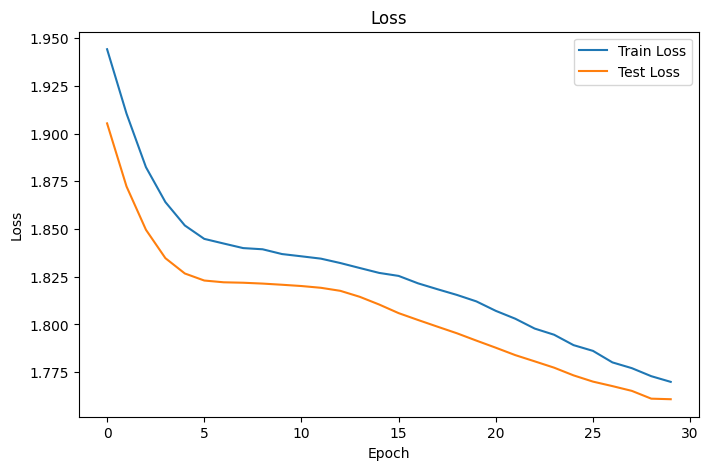

In [248]:
# Plot Loss Curves
plt.figure(figsize=(8, 5))
plt.title('Loss')
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [243]:
with torch.no_grad():
    predictions = model(X_val_tensor)
    max_values, max_indices = torch.max(predictions, dim=1)
    print("Predicted Labels:", max_indices)

Predicted Labels: tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])


In [198]:
test_set_raw = pd.read_csv("Test_Set_EEG.csv")
test_set_raw.head()

,ID,sex,age,eeg.date,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,17,M,33.42,2016.7.13,13.0,99.0,18.298852,20.727033,13.261675,15.886505,...,47.369509,29.750462,36.199884,47.606010,25.949897,27.358598,35.594365,22.758717,29.935265,36.734639
1,28,M,21.00,2017.12.15,12.0,96.0,19.582317,19.361081,12.474928,15.782731,...,82.339470,59.173842,62.650658,60.135772,76.513270,47.052214,68.780315,36.348038,65.033239,44.962903
2,33,M,31.20,2014.5.13,12.0,77.0,8.586290,7.780097,10.988097,8.824057,...,89.692658,54.274851,60.789694,69.561827,70.339738,50.588009,75.275265,43.897477,78.079657,60.430207
3,41,M,50.08,2012.12.5,11.0,108.0,17.228763,14.103134,5.363740,10.093295,...,87.727331,54.979820,81.987264,88.628318,66.455585,66.486936,83.386597,41.805748,69.200769,74.109527
4,48,M,27.19,2015.6.24,13.0,84.0,7.642189,8.196870,6.707214,9.105748,...,68.183641,47.030523,73.424824,72.641229,42.725536,53.852002,63.786830,43.858619,54.839180,69.820884
